In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

Data Source URL:
https://finance.yahoo.com/quote/VOO/history?p=VOO

In [22]:
df = pd.read_csv('VOO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-09-09,102.500000,102.500000,101.139999,101.320000,83.143929,26500
1,2010-09-10,101.680000,101.860001,101.300003,101.779999,83.521400,8600
2,2010-09-13,102.959999,103.139999,102.500000,103.059998,84.571770,33700
3,2010-09-14,102.839996,103.480003,102.379997,103.040001,84.555374,59400
4,2010-09-15,102.620003,103.379997,102.400002,103.300003,84.768715,9200


In [29]:
#data: raw data
#future_days: number of days forward to be predicted
#threshold: determines the width of confidence band; varies from 0-3, which corresponds to the narrowest(85%) 
# and the widest(99%) confidence interval

def log_lm(data,future_days,threshold):
    X=(np.arange(data.shape[0])+1).reshape(-1,1)
    Y=np.log(data['Adj Close'])
    regressor = LinearRegression()
    regressor.fit(X, Y)
    #Print Coefficients
    print('slope:', regressor.coef_)
    print('intercept:', regressor.intercept_)
    #Make predictions and get confidence interval
    X_test=(np.arange(df.shape[0]+future_days)+1).reshape(-1,1)
    y_pred=regressor.predict(X)
    y_test=regressor.predict(X_test)
    print('R-squared:',round(regressor.score(X,Y),4)*100, '%')
    sum_errs = np.sum((Y - y_pred)**2)
    stdev = np.sqrt(1 / (len(Y) - 2) * sum_errs)
    conf = np.array([0.15,0.1,0.05,0.01])
    ppf_lookup = 1 - (conf / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
    #plot
    CI=np.zeros((len(y_test),8))
    fig=plt.figure(figsize=(15,8))
    plt.plot(X, np.exp(Y))
    plt.plot(X_test, np.exp(y_test), color='blue', linewidth=3)
    for i in np.arange(4):
        lower, upper = y_test - interval[i], y_test + interval[i]
        CI[:,i*2]=np.exp(lower)
        CI[:,i*2+1]=np.exp(upper)
        plt.plot(X_test,CI[:,i*2])
        plt.plot(X_test,CI[:,i*2+1])
    plt.show()
    
    smallx=X_test[-300:]
    smally=y_test[-300:]
    fig=plt.figure(figsize=(15,7))
    plt.plot(X[-(300-future_days):], np.exp(Y[-(300-future_days):]))
    plt.plot(smallx, np.exp(smally), color='blue', linewidth=3)
    for i in np.arange(4):
        plt.plot(smallx,CI[-300:,i*2])
        plt.plot(smallx,CI[-300:,i*2+1])
    plt.show()
    #trade prices of the next future_days days,threshold=0/1/2/3
    price=[CI[-future_days:,threshold*2],CI[-future_days:,threshold*2+1]]
    return(price)

slope: [0.00048817]
intercept: 4.507214959767773
R-squared: 96.91 %


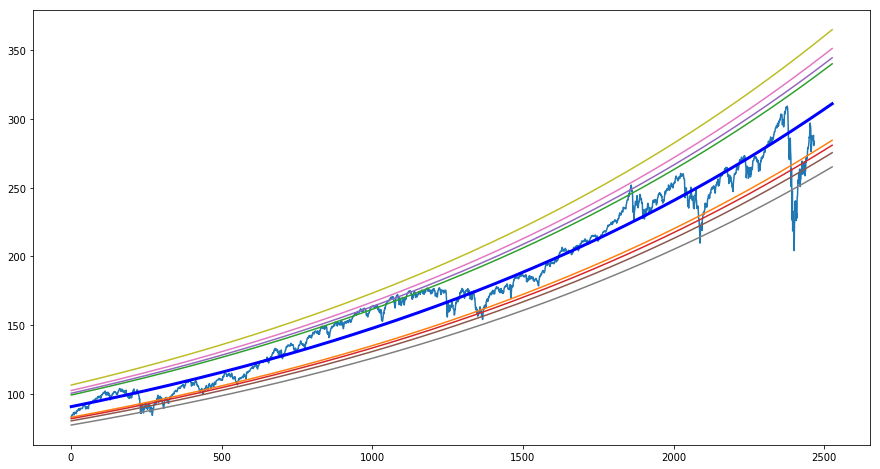

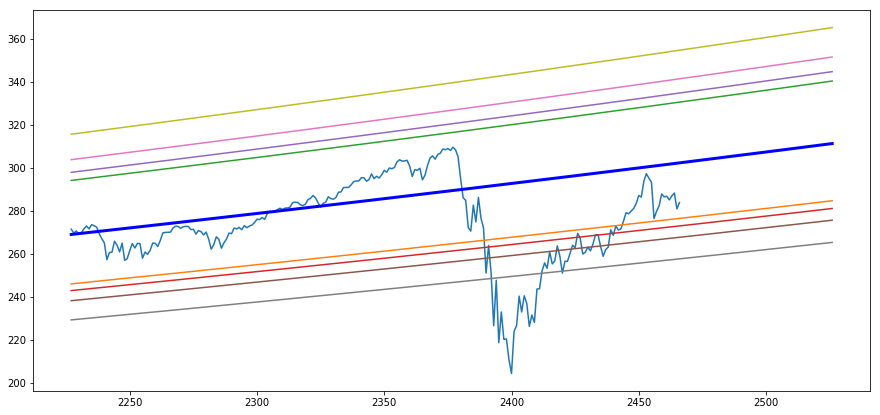

In [30]:
algo=log_lm(df,60,0)

In [131]:
print(algo[0][0:5])
print(algo[1][0:5])

[275.42584285 275.53802442 275.65025168 275.76252465 275.87484335]
[329.09595055 329.22999208 329.3640882  329.49823894 329.63244432]
